# Serial founder events with migration, founder events and allele frequency variation

In these simulations, the urban environment was colonized through serial founder events beginning from a single rural population at carrying capcity. Simulations varried the initial frequency of both dominant alleles (i.e. _CYP79D15_ and _Li_) in the starting rural population. We performed simulations under 3 migration rates: 0, 0.01, 0.05. Similarly, we used 3 fouding proportions: 0.01, 0.2, 1.0. The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 81): 

* Number of simulations: 1000
* Number of generations: 500 (following filling of matrix)
* Max Creation probability: 1.0
* Bottleneck proportion: [0.01; 0.2; 1.0]
* pA and pB: [0.1; 0.5; 0.9] and [0.1; 0.5; 0.9]
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (rural): 1000
* Minimum _K_ (urban): 1000

**Note that simulations were accidently run from urban to rural. Since there is no selection in these simulations, this distinction is unimportant with respect to the formation of clines. However, to keep results consistent with previous simulations, I took the absolute value of the mean slope when plotting and swapped positive and negative clines. By doing this, the results are presented as if colonization had occured from rural to urban**

In [1]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)

Loading required package: lattice

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

In [3]:
#Working directory for datasets varying migration rate and bottleneck proportion 
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/oneFill_Bottlenecks_AlleleFreq')

#Load datasets that will be used for analyses
MeansProps <- fread('20180121_MeansProps_oneFill_Bottlenecks_AlleleFreq.csv', header = T)
MeansProps$AlleleFreqs <- paste(MeansProps$pA_start, MeansProps$pB_start, sep = "-")
MeansProps$AlleleFreqs <- as.factor(as.character(MeansProps$AlleleFreqs))
MeansProps$AlleleFreqs <- factor(MeansProps$AlleleFreqs, levels=c("0.1-0.1", "0.1-0.5", "0.5-0.1", "0.1-0.9", 
                                                                "0.9-0.1", "0.5-0.5", "0.5-0.9", "0.9-0.5", 
                                                                "0.9-0.9"))
MeansProps$Mig_rate = as.factor(as.character(MeansProps$Mig_rate))
MeansProps$bot = as.factor(as.character(MeansProps$bot))

#Data subsets
MeansProps_GenOne_StrongBot <- subset(MeansProps, seq == "1" & bot == "0.01")
MeansProps_GenOne_Interbot <- subset(MeansProps, seq == "1" & bot == "0.2")
MeansProps_GenOne_NoBot <- subset(MeansProps, seq == "1" & bot == "1")
MeansProps_GenOne_NoMig <- subset(MeansProps, seq == "1" & Mig_rate == "0")

In [34]:
MeansProps_GenOne_StrongBot[,c(1, 2, 6, 23)]

bot,Mig_rate,mean,AlleleFreqs
0.01,0,-0.00017023329,0.1-0.1
0.01,0,-0.00050699617,0.1-0.5
0.01,0,-0.00071378105,0.1-0.9
0.01,0,-0.00043193030,0.5-0.1
0.01,0,-0.00143464099,0.5-0.5
0.01,0,-0.00163271321,0.5-0.9
0.01,0,-0.00052119061,0.9-0.1
0.01,0,-0.00176766255,0.9-0.5
0.01,0,-0.00095431349,0.9-0.9
0.01,0.01,-0.00022420549,0.1-0.1


In [31]:
options(scipen=999)
2.324882e-05

[1] 0.00002324882

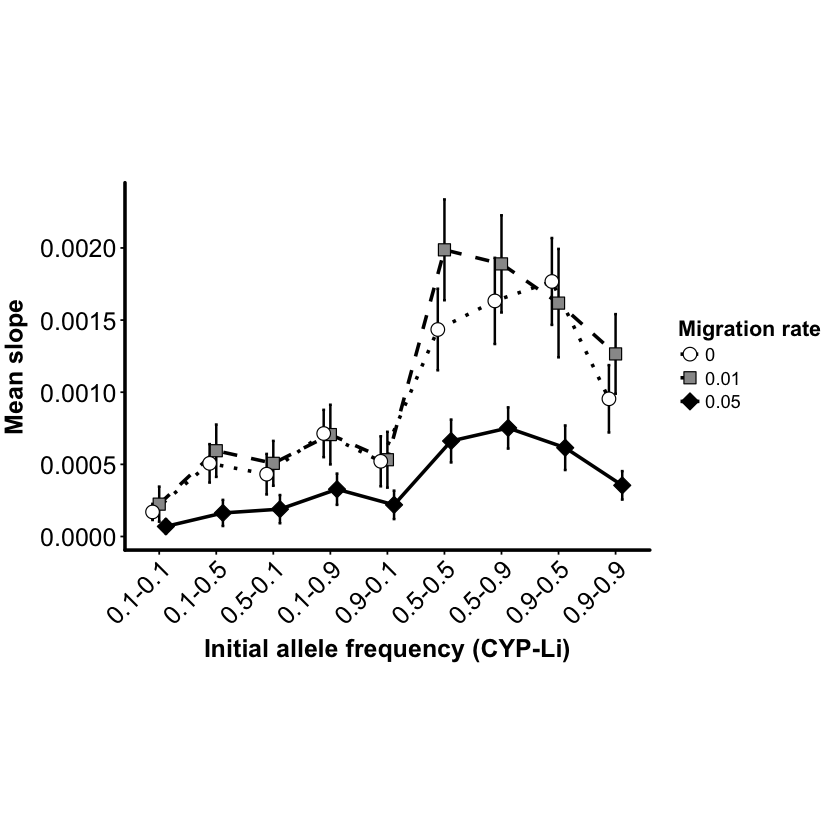

In [37]:
MeanSlope_StrongBot_AlleleFreqs <- ggplot(MeansProps_GenOne_StrongBot, aes(x = AlleleFreqs, y = abs(mean), group = Mig_rate)) + 
    geom_errorbar(aes(ymin = abs(mean) - ci_mean, ymax = abs(mean) + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
#     coord_cartesian(ylim = c(0, 0.0067)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Initial allele frequency (CYP-Li)") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_StrongBot_AlleleFreqs

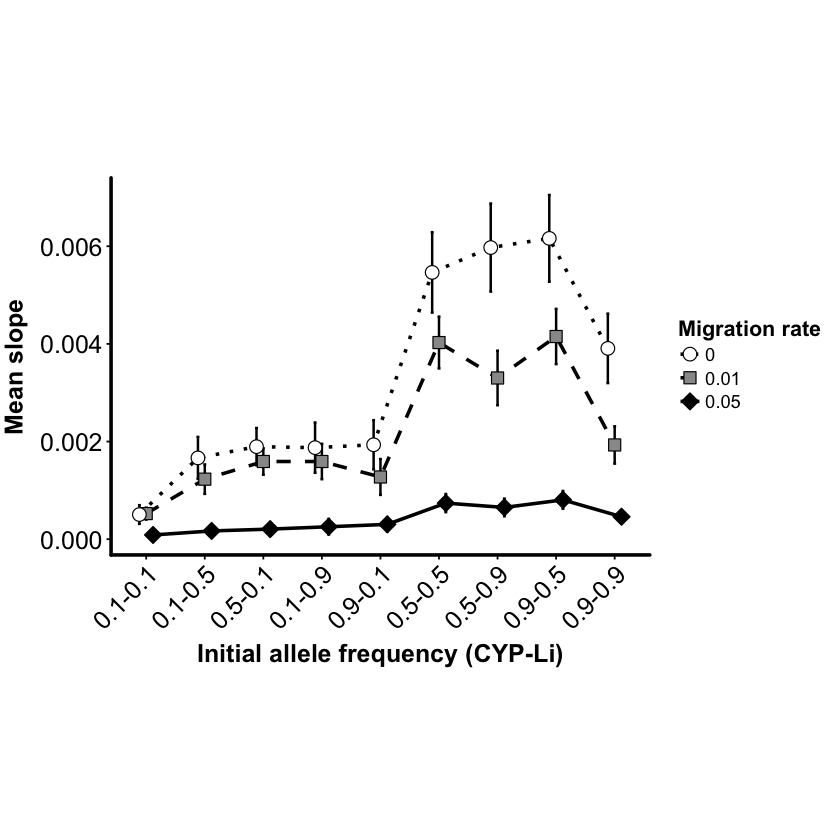

In [38]:
MeanSlope_InterBot_AlleleFreqs <- ggplot(MeansProps_GenOne_Interbot, aes(x = AlleleFreqs, y = abs(mean), group = Mig_rate)) + 
    geom_errorbar(aes(ymin = abs(mean) - ci_mean, ymax = abs(mean) + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
#     coord_cartesian(ylim = c(-0.007, 0.006)) + scale_y_continuous(breaks = seq(from = -0.007, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Initial allele frequency (CYP-Li)") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_InterBot_AlleleFreqs

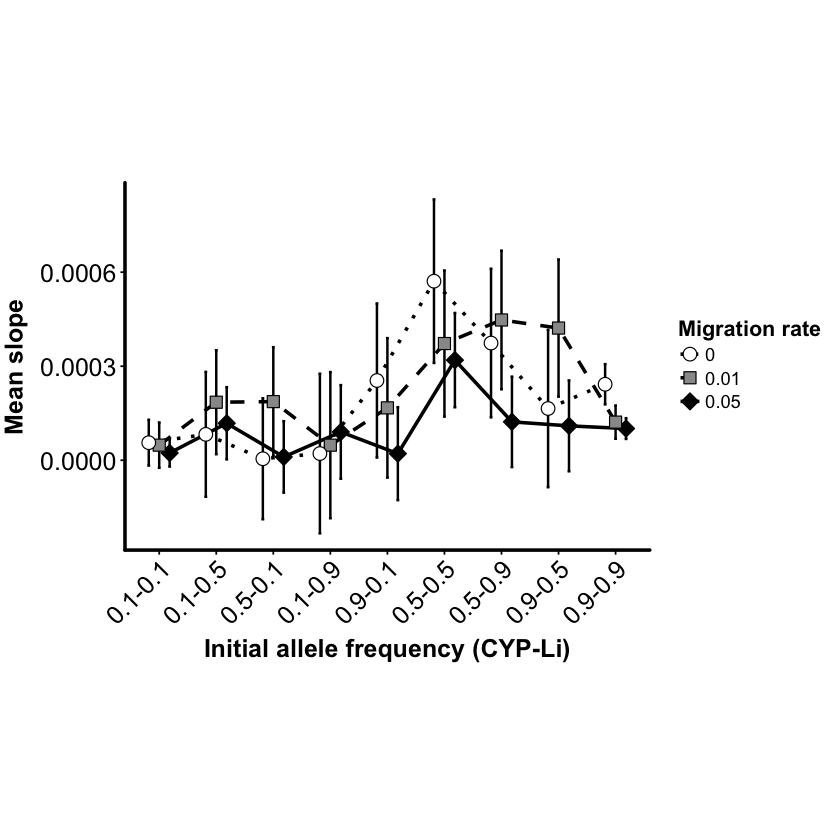

In [39]:
MeanSlope_NoBot_AlleleFreqs <- ggplot(MeansProps_GenOne_NoBot, aes(x = AlleleFreqs, y = abs(mean), group = Mig_rate)) + 
    geom_errorbar(aes(ymin = abs(mean) - ci_mean, ymax = abs(mean) + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.55)) +
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.55)) +
    geom_point(size = 3.5, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.55)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    scale_y_continuous(labels = scales::comma) +
    ylab("Mean slope") + xlab("Initial allele frequency (CYP-Li)") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_NoBot_AlleleFreqs

In [10]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
SlopeSum_Melt_NoMig <- dplyr::select(MeansProps_GenOne_NoMig, AlleleFreqs, bot, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(MeansProps_GenOne_NoMig[,c("bot", "prop_sigPos", "ci_sigPos", "AlleleFreqs")], 
            id=c("bot", "ci_sigPos", "AlleleFreqs"))
dm2 <- melt(MeansProps_GenOne_NoMig[,c("bot", "prop_sigNeg", "ci_sigNeg", "AlleleFreqs")], 
            id=c("bot", "ci_sigNeg", "AlleleFreqs"))

#Rename columns
setnames(dm1, old = "ci_sigPos", new = "ci")
setnames(dm2, old = "ci_sigNeg", new = "ci")

#Merge melted dataframes
SlopeSum_Melt_NoMig <- rbind(dm1, dm2)
# SlopeSum_Melt_NoMig <- within(SlopeSum_Melt_NoMig, {
#     variable = ifelse(variable == "prop_sigPos", "Negative", "Positive")
# })
SlopeSum_Melt_NoMig

bot,ci,AlleleFreqs,variable,value
0.01,0.005167491,0.1-0.1,prop_sigPos,0.007
0.01,0.012573213,0.1-0.5,prop_sigPos,0.043
0.01,0.015279831,0.1-0.9,prop_sigPos,0.065
0.01,0.012984020,0.5-0.1,prop_sigPos,0.046
0.01,0.025066860,0.5-0.5,prop_sigPos,0.206
0.01,0.026583193,0.5-0.9,prop_sigPos,0.243
0.01,0.016123427,0.9-0.1,prop_sigPos,0.073
0.01,0.026944904,0.9-0.5,prop_sigPos,0.253
0.01,0.019847746,0.9-0.9,prop_sigPos,0.116
0.2,0.007533899,0.1-0.1,prop_sigPos,0.015


In [11]:
# Data subsets
SlopeSum_Melt_NoMig_StrongBot <- subset(SlopeSum_Melt_NoMig, bot == "0.01")
SlopeSum_Melt_NoMig_InterBot <- subset(SlopeSum_Melt_NoMig, bot == "0.2")
SlopeSum_Melt_NoMig_NoBot <- subset(SlopeSum_Melt_NoMig, bot == "1")
SlopeSum_Melt_NoMig_Bot_Pos <- subset(SlopeSum_Melt_NoMig, variable == "prop_sigPos")
SlopeSum_Melt_NoMig_Bot_Neg <- subset(SlopeSum_Melt_NoMig, variable == "prop_sigNeg")

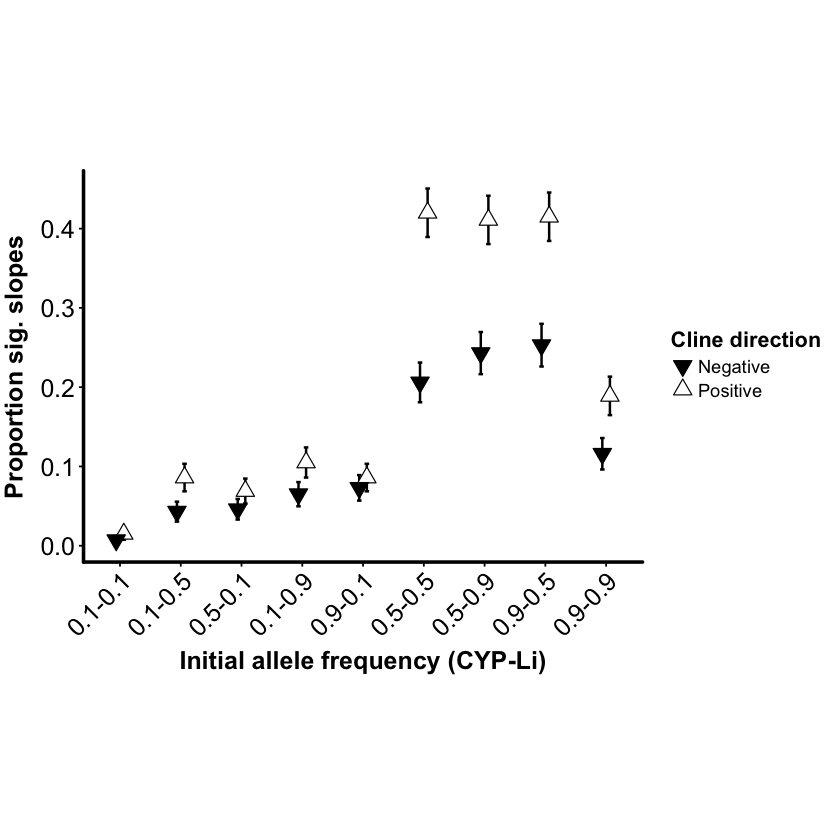

In [40]:
#Plot proportion of significant slopes by migration rate
PropSig_StrongBot_NoMig_AlleleFreqs <- ggplot(SlopeSum_Melt_NoMig_StrongBot, aes(x = factor(AlleleFreqs), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Initial allele frequency (CYP-Li)") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Negative", "Positive"),values=c(25, 24))+
    scale_fill_manual(labels = c("Negative", "Positive"),values=c("black", "white")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_StrongBot_NoMig_AlleleFreqs

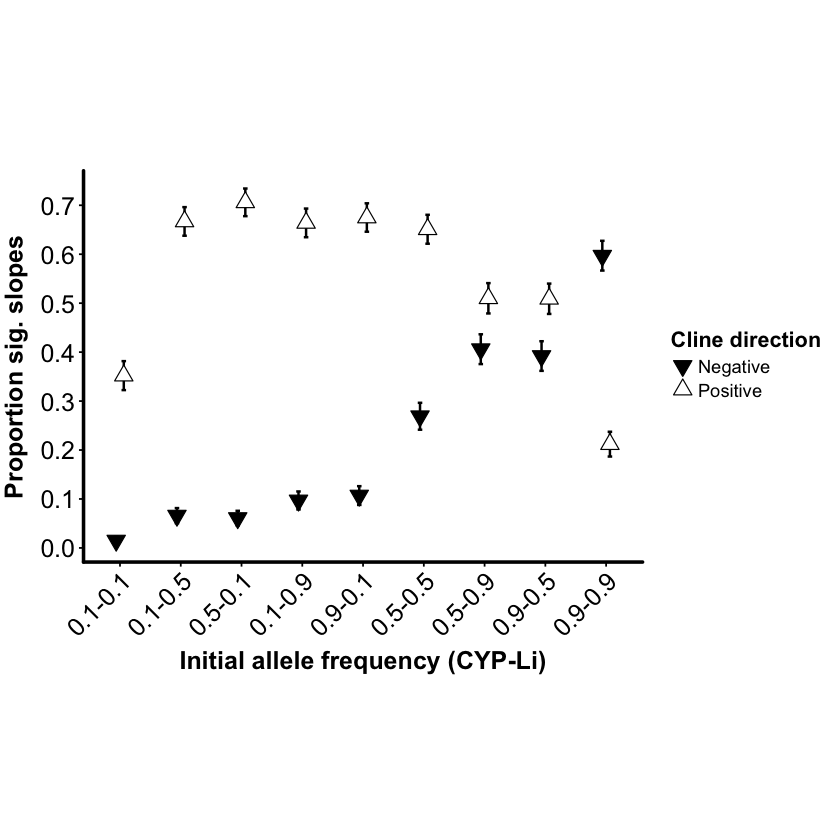

In [41]:
#Plot proportion of significant slopes by migration rate
PropSig_InterBot_NoMig_AlleleFreqs <- ggplot(SlopeSum_Melt_NoMig_InterBot, aes(x = factor(AlleleFreqs), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Initial allele frequency (CYP-Li)") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Negative", "Positive"),values=c(25, 24))+
    scale_fill_manual(labels = c("Negative", "Positive"),values=c("black", "white")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_InterBot_NoMig_AlleleFreqs

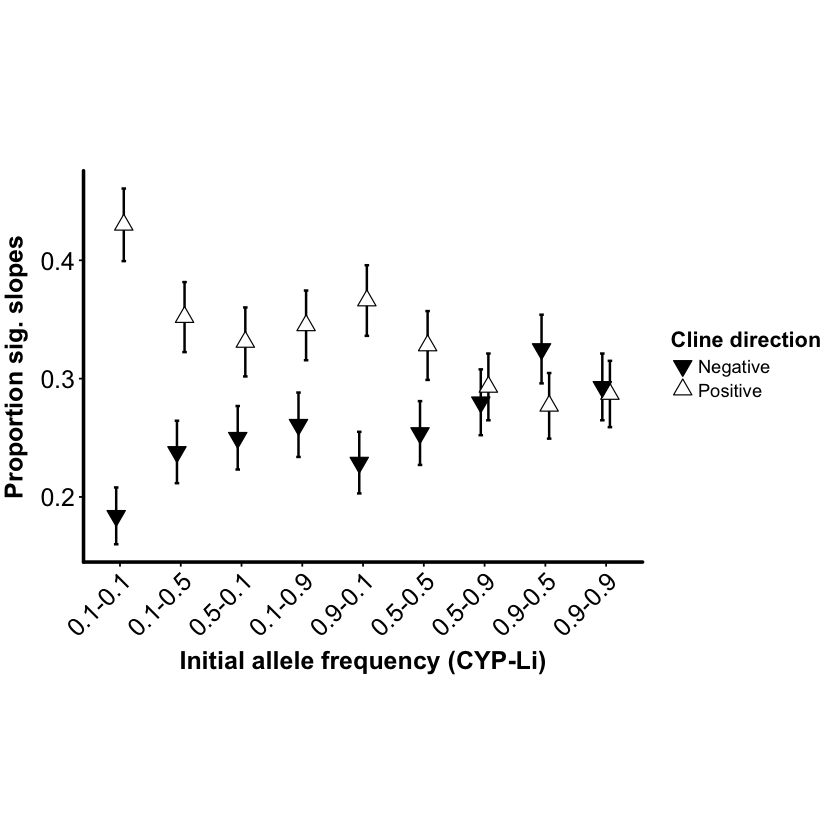

In [42]:
#Plot proportion of significant slopes by migration rate
PropSig_NoBot_NoMig_AlleleFreqs <- ggplot(SlopeSum_Melt_NoMig_NoBot, aes(x = factor(AlleleFreqs), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Initial allele frequency (CYP-Li)") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Negative", "Positive"),values=c(25, 24))+
    scale_fill_manual(labels = c("Negative", "Positive"),values=c("black", "white")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_NoBot_NoMig_AlleleFreqs

In [16]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/SEC_Figures"

MeanSlope_StrongBot_NoLeg_AlleleFreqs = MeanSlope_StrongBot_AlleleFreqs + theme(legend.position="none")
MeanSlope_InterBot_NoLeg_AlleleFreqs = MeanSlope_InterBot_AlleleFreqs + theme(legend.position="none")
MeanSlope_NoBot_NoLeg_AlleleFreqs = MeanSlope_NoBot_AlleleFreqs + theme(legend.position="none")
PropSig_StrongBot_NoMig_NoLeg_AlleleFreqs = PropSig_StrongBot_NoMig_AlleleFreqs + theme(legend.position="none")
PropSig_InterBot_NoMig_NoLeg_AlleleFreqs = PropSig_InterBot_NoMig_AlleleFreqs + theme(legend.position="none")
PropSig_NoBot_NoMig_NoLeg_AlleleFreqs = PropSig_NoBot_NoMig_AlleleFreqs + theme(legend.position="none")

ggsave("Figure-S2C_MeanSlope_StrongBot_NoLeg_AlleleFreqs.pdf", plot = MeanSlope_StrongBot_NoLeg_AlleleFreqs, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S2B_MeanSlope_InterBot_NoLeg_AlleleFreqs.pdf", plot = MeanSlope_InterBot_NoLeg_AlleleFreqs, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S2A_MeanSlope_NoBot_NoLeg_AlleleFreqs.pdf", plot = MeanSlope_NoBot_NoLeg_AlleleFreqs, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S2F_PropSig_StrongBot_NoMig_NoLeg_AlleleFreqs.pdf", plot = PropSig_StrongBot_NoMig_NoLeg_AlleleFreqs, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S2E_PropSig_InterBot_NoMig_NoLeg_AlleleFreqs.pdf", plot = PropSig_InterBot_NoMig_NoLeg_AlleleFreqs, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S2D_PropSig_NoBot_NoMig_NoLeg_AlleleFreqs.pdf", plot = PropSig_NoBot_NoMig_NoLeg_AlleleFreqs, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
